## E-ticaret sitesi kullanıcı davranışı analizi projesi:
Kullanıcıların bir e-ticaret platformu üzerinde nasıl hareket ettiklerini, neler satın aldıklarını, hangi ürünleri incelediklerini ve alışveriş alışkanlıklarını inceleyen bir süreçtir. Veri toplama ve analiz yoluyla, kullanıcı davranışlarını anlayarak işletmenin satış stratejilerini, pazarlama kampanyalarını ve web sitesi tasarımını iyileştirmek, müşteri memnuniyetini artırmak ve müşteri sadakatini güçlendirmektir.

Bu veri çerçevesi (dataframe) 8 değişken (sutün) içerir:

InvoiceNo: Fatura numarası. Nominal, her işleme benzersiz olarak atanan 6 basamaklı bir tam sayı. 
Koddun çıktısında 'c' harfi ile başlıyorsa, sipariş iptal olduğunu gösterir.
StockCode:  Ürün kodu. Nominal, her farklı ürüne benzersiz olarak 5 basamaklı bir tam sayı atanır.
Product: Ürün adı. Nominal.
Quantity: İşlem başına her bir ürünün miktarı. Sayısal.
InvoiceDate: Fatura Tarihi ve saati. Sayısal, her bir işlemin oluşturulduğu gün ve saat.
UnitPrice: Birim fiyatı. Sayısal, Euro cinsinden birim başına ürün fiyatı.
CustomerID: Müşteri numarası. Nominal, her müşteriye benzersiz olarak atanan 5 basamaklı bir tam sayı.
Country: Ülke adı. Nominal, her müşterinin ikamet ettiği ülkenin adı.

### Veri Setini Yükleme ve İlk Bakış

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings

In [3]:
# Veri setini yükleme
df = pd.read_csv('data.csv',dtype={'CustomerID': str,'InvoiceNo': str, 'StockCode': str})
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# İlk beş satırı gösterme
df.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom


In [4]:
# Veri setinin genel bir özetini görüntüleme
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499428 entries, 0 to 499427
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    499428 non-null  object        
 1   StockCode    499428 non-null  object        
 2   Product      498099 non-null  object        
 3   Quantity     499428 non-null  int64         
 4   InvoiceDate  499428 non-null  datetime64[ns]
 5   UnitPrice    499428 non-null  float64       
 6   CustomerID   379979 non-null  object        
 7   Country      499428 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 30.5+ MB


In [5]:
# Verilerin temel istatistikleri gösterme
df.describe(include='all')

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,499428,499428,498099,499428.000000,499428,499428.000000,379979,499428
unique,23875,3993,4115,NaN,NaN,NaN,4244,37
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841,United Kingdom
freq,1114,2077,2128,NaN,NaN,NaN,7692,455353
mean,NaN,NaN,NaN,9.679517,2011-07-22 01:47:04.336961280,4.481693,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,2011-01-04 10:00:00,-11062.060000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,2011-04-21 18:10:00,1.250000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,2011-08-05 15:38:00,2.080000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-25 10:32:00,4.130000,NaN,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,NaN,NaN


In [6]:
#Veri Setin boyutunu gösterme
df.shape

(499428, 8)

In [7]:
# NaN değerleri içeren satırları filtreleme - eksik veri
nan_rows = df[df.isna().any(axis=1)] 
# Filtrelenmiş satırları gösterme
nan_rows

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
17,539994,22830,NaN,-1,2011-01-04 10:09:00,0.00,NaN,United Kingdom
18,539995,85064,NaN,-12,2011-01-04 10:12:00,0.00,NaN,United Kingdom
19,539996,21784,NaN,-10,2011-01-04 10:12:00,0.00,NaN,United Kingdom
20,539997,84689,NaN,5,2011-01-04 10:15:00,0.00,NaN,United Kingdom
21,539998,84675,NaN,2,2011-01-04 10:16:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
499055,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
499056,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
499057,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
499058,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


### Veri Ön İşleme

In [8]:
# Eksik veri kontrolü yapalım
print("Eksik veri sayısı her sütunda:")
df.isnull().sum()

Eksik veri sayısı her sütunda:


InvoiceNo           0
StockCode           0
Product          1329
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     119449
Country             0
dtype: int64

In [9]:
# Öncelikle eksik verilerin tüm sütunlarda olduğu satırları seçer ve değişkene atanır
removed_rows = df[df.isna().all(axis=1)]
# Şimdi bu satırları orijinal DataFrame'den kaldırır
df.dropna(how='all', inplace=True)

display(removed_rows)

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [10]:
# Eğer sayısal bir sütunda eksik değerler varsa, median ile doldurulur
# Kategorik sütunlar için en sık tekrar eden değer ile doldurulur

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].fillna(df[column].median(), inplace=True)
    elif pd.api.types.is_object_dtype(df[column]):
        df[column].fillna(df[column].mode()[0], inplace=True)

print("\nEksik veri sayısı her sütunda (doldurma sonrası):")
df.isnull().sum()


Eksik veri sayısı her sütunda (doldurma sonrası):


InvoiceNo      0
StockCode      0
Product        0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
# Yinelenen girişleri kontrol edilyor ve silinyor:
print('Yinelenen girişler: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Yinelenen girişler: 4768


In [12]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Veri çerçevesindeki ülke sayısı: {}'.format(len(countries)))

Veri çerçevesindeki ülke sayısı: 37


In [13]:
pd.DataFrame([{'ürünler': len(df['StockCode'].value_counts()),    
               'işlemler': len(df['InvoiceNo'].value_counts()),
               'müşteriler': len(df['CustomerID'].value_counts()),  
              }], columns = ['ürünler', 'işlemler', 'müşteriler'], index = ['quantity'])

,ürünler,işlemler,müşteriler
quantity,3993,23875,4244


## Keşifsel veri analizi

In [14]:
# 'CustomerID' bazında gruplandırıp 'InvoiceDate' sütununu sayarak her müşterinin kaç adet ürün aldığını hesaplar
temp = df.groupby('CustomerID', as_index=False)['InvoiceDate'].count()

total_products_per_customer = temp.rename(columns={'InvoiceDate':'Toplam Ürün Adedi'})

# Müşteri ID'lerine göre sıralar ve ilk 10 kaydı gösterir
sorted_total_products_per_customer = total_products_per_customer.sort_values('CustomerID')
sorted_total_products_per_customer

,CustomerID,Toplam Ürün Adedi
0,12346,2
1,12347,151
2,12348,14
3,12349,73
4,12350,17
...,...,...
4239,18280,10
4240,18281,7
4241,18282,13
4242,18283,721


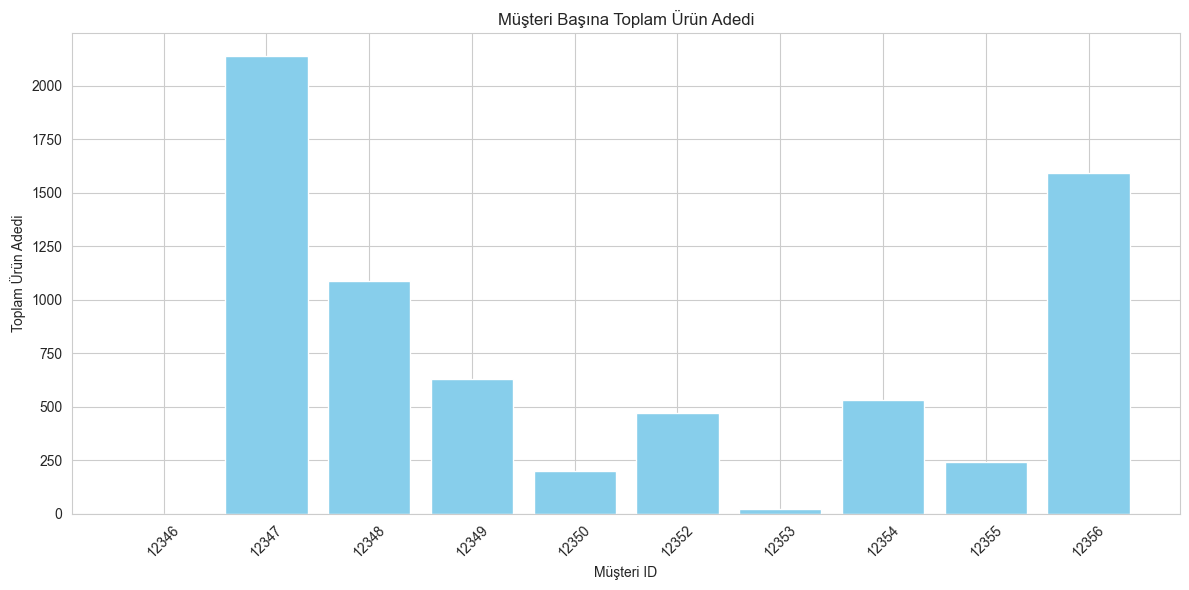

In [15]:
# 'CustomerID' bazında gruplandırıp 'Quantity' sütununu toplayarak her müşterinin kaç adet ürün aldığını hesaplar
total_products_per_customer = df.groupby('CustomerID', as_index=False)['Quantity'].sum()

# Sütun adını 'Toplam Ürün Adedi' olarak değiştirir
total_products_per_customer.rename(columns={'Quantity':'Toplam Ürün Adedi'}, inplace=True)

# Müşteri ID'lerine göre sıralar
total_products_per_customer.sort_values('CustomerID', inplace=True)

top_10_customers = total_products_per_customer.head(10)

plt.figure(figsize=(12,6))
plt.bar(top_10_customers['CustomerID'].astype(str), top_10_customers['Toplam Ürün Adedi'], color='skyblue')
plt.title('Müşteri Başına Toplam Ürün Adedi')
plt.xlabel('Müşteri ID')
plt.ylabel('Toplam Ürün Adedi')
plt.xticks(rotation=45) 
plt.tight_layout() 

plt.show()

In [16]:
# 'Country' bazında gruplandırıp 'Quantity' sütununu toplayarak her ülkenin toplam satış miktarını hesaplayın
sales_data = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# En fazla satış yapan ülkeyi bul
top_sales_country = sales_data.idxmax()
top_sales_value = sales_data.max()

# En fazla satış yapan ülkeyi ve satış miktarını yazdır
print(top_sales_country +":")
top_sales_value

United Kingdom:


3953394

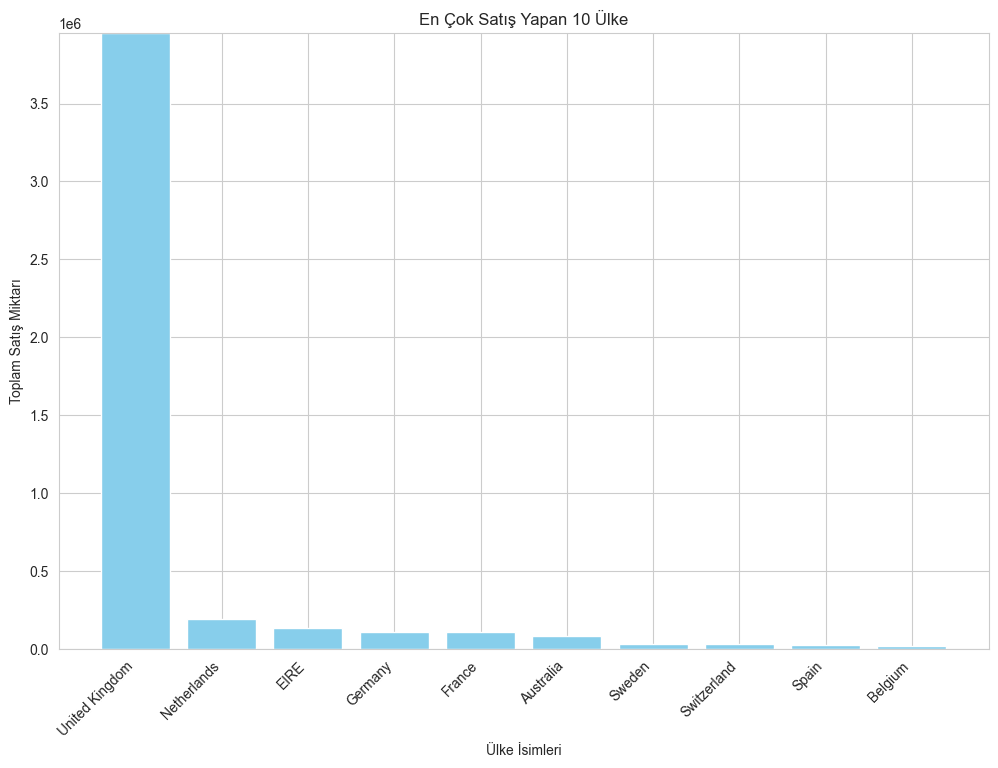

In [17]:
# 'Country' bazında gruplandırıp 'Quantity' sütununu toplayarak her ülkenin toplam satış miktarını hesaplar
sales_data = df.groupby('Country')[['Quantity']].sum().sort_values('Quantity', ascending=False)

# İlk 10 ülkeyi alır (en çok satış yapan ülkeler)
top_sales_data = sales_data.head(10)

fig, ax = plt.subplots(figsize=(12, 8)) 

ax.bar(top_sales_data.index, top_sales_data['Quantity'], color='skyblue')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

plt.title('En Çok Satış Yapan 10 Ülke')
plt.xlabel('Ülke İsimleri')
plt.ylabel('Toplam Satış Miktarı')

plt.ylim(0, top_sales_data['Quantity'].max() + 10)
plt.show()

In [18]:
# 'Country' bazında gruplandırıp 'Quantity' sütununu toplayarak her ülkenin toplam satış miktarını hesaplayın
sales_data = df.groupby('Country')[['Quantity']].sum().sort_values('Quantity', ascending=True)

# En az satış yapan 10 ülkeyi al
least_sales_countries = sales_data.head(1)

# En az satış yapan 10 ülkeyi ve satış miktarlarını yazdır
least_sales_countries

,Quantity
Country,
Saudi Arabia,75


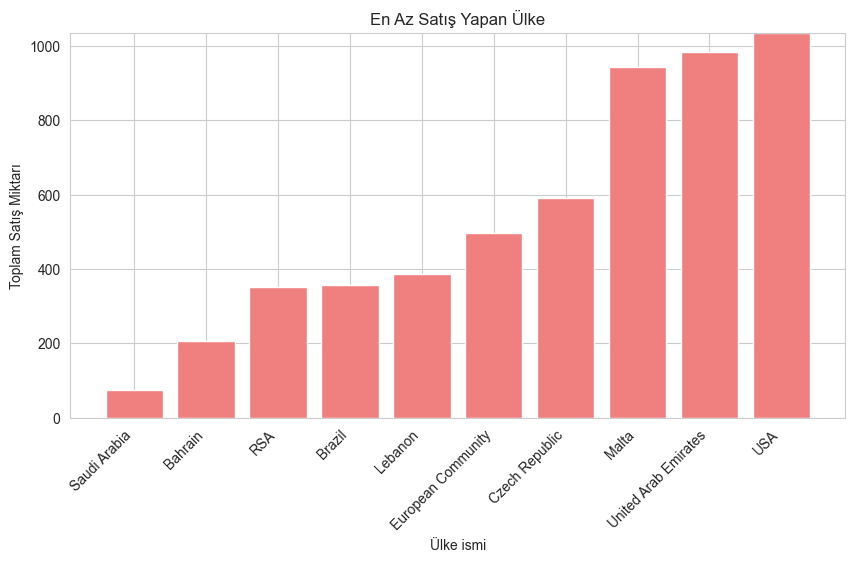

In [19]:
# 'Country' bazında gruplandırıp 'Quantity' sütununu toplayarak her ülkenin toplam satış miktarını hesaplayın
sales_data = df.groupby('Country')[['Quantity']].sum().sort_values('Quantity', ascending=True)

# En az satış yapan ülkeyi ve satış miktarını al
bottom_country = sales_data.head(10)

# Görselleştirme
fig, ax = plt.subplots(figsize=(10, 5))  # Grafik boyutunu ayarla

# En az satış yapan ülkenin çubuk grafiğini çiz
ax.bar(bottom_country.index, bottom_country['Quantity'], color='lightcoral')

# Etiketleri döndürmek ve sağa hizalı yapmak
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Başlık ve eksen etiketlerini ekle
plt.title('En Az Satış Yapan Ülke')
plt.xlabel('Ülke ismi')
plt.ylabel('Toplam Satış Miktarı')

# Y ekseninin alt sınırını 0 olarak ayarla
plt.ylim(0, bottom_country['Quantity'].max() + 1)

plt.show()

In [20]:
# 'Country' bazında gruplandırıp 'Quantity' sütununu toplayarak her ülkenin toplam satış miktarını hesaplayın
sales_data = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Sıralanmış ülkeleri ve satış miktarlarını yazdır
sales_data


Country
United Kingdom          3953394
Netherlands              193317
EIRE                     137114
Germany                  110630
France                   105460
Australia                 83199
Sweden                    31918
Switzerland               29599
Spain                     25950
Belgium                   21397
Japan                     21125
Norway                    15665
Portugal                  15208
Finland                    9412
Channel Islands            9393
Denmark                    7734
Italy                      7706
Cyprus                     5380
Singapore                  5234
Austria                    4824
Hong Kong                  4709
Israel                     4406
Poland                     3513
Unspecified                3295
Canada                     2763
Iceland                    2139
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Czech Republic              592


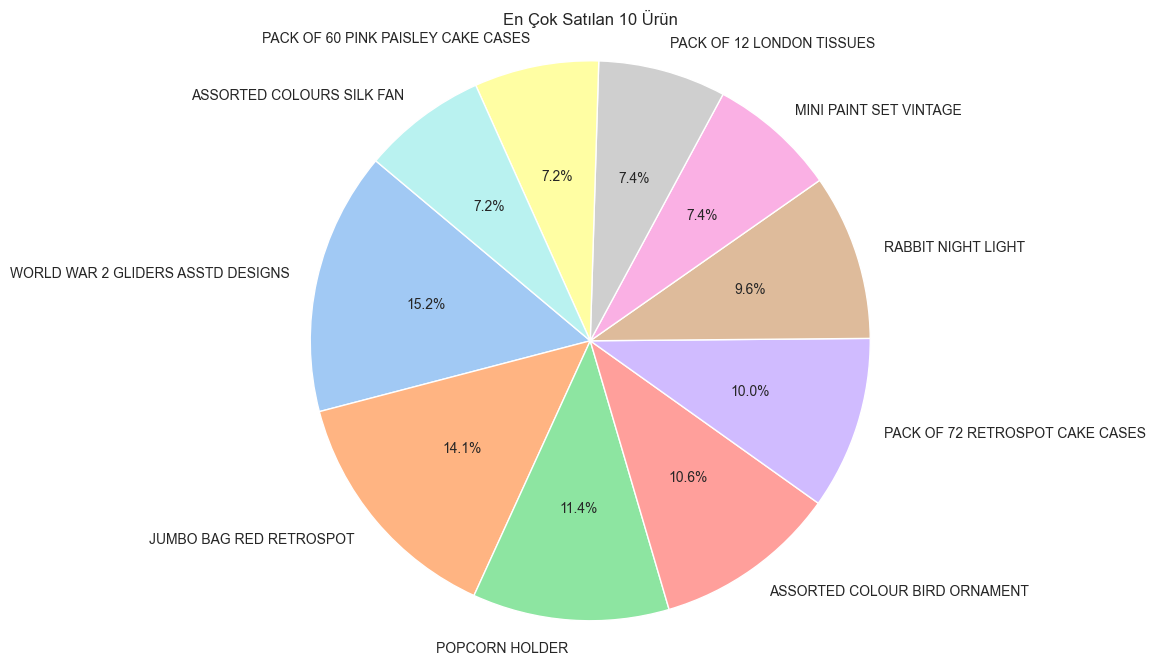

In [21]:
# 'Product' bazında gruplandırıp 'Quantity' sütununu toplayarak her ürünün toplam satış miktarını hesaplayın
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)

# Seaborn renk paletini kullanarak renkler listesi oluştur
colors = sns.color_palette('pastel')[0:10]

# Pasta grafiği çiz
plt.figure(figsize=(10, 8))  # Grafik boyutunu ayarla
plt.pie(top_products, labels=top_products.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('En Çok Satılan 10 Ürün')
plt.axis('equal')  # Pasta grafiğinin daire şeklinde olmasını sağla
plt.show()

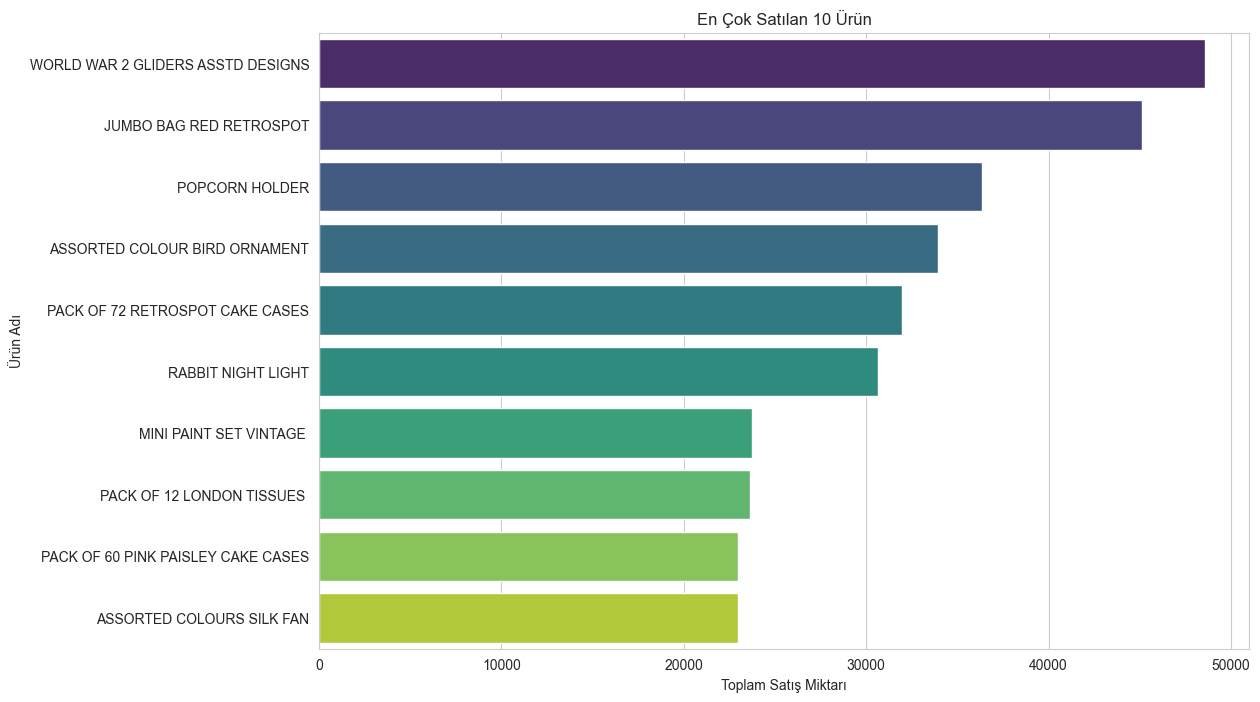

In [22]:
# 'Product' bazında gruplandırıp 'Quantity' sütununu toplayarak her ürünün toplam satış miktarını hesaplama
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)

# DataFrame'i resetleyerek ürün isimlerini bir sütuna getirme
top_products = top_products.reset_index()

# Seaborn ile çubuk grafiği çiz
plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='Product', data=top_products, palette='viridis', hue='Product')
plt.legend([],[], frameon=False)

plt.title('En Çok Satılan 10 Ürün')
plt.xlabel('Toplam Satış Miktarı')
plt.ylabel('Ürün Adı')
plt.show()


In [23]:
# Tarih sütununu datetime'a çevirin, eğer zaten değilse
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Yıl ve ay sütunlarını ekleyin
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Yıl ve ay bazında gruplandırıp 'Quantity' sütununu toplayın
monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()
monthly_sales


,Year,Month,Quantity
0,2011,1,308281
1,2011,2,277374
2,2011,3,351165
3,2011,4,288237
4,2011,5,379652
5,2011,6,340945
6,2011,7,389051
7,2011,8,405450
8,2011,9,548669
9,2011,10,569749


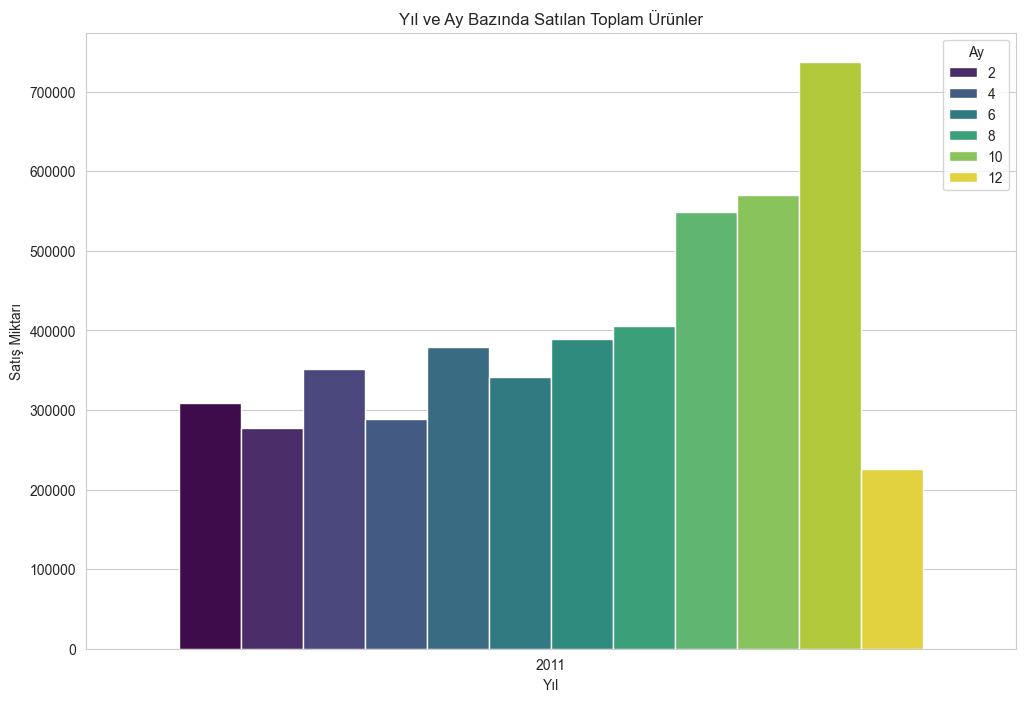

In [24]:
# Tarih sütununu datetime'a çevirir
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Yıl ve ay sütunlarını 
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Yıl ve ay bazında gruplandırıp 'Quantity' sütununu 
monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Seaborn ile çubuk grafiği 
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Quantity', hue='Month', data=monthly_sales, palette='viridis')

plt.title('Yıl ve Ay Bazında Satılan Toplam Ürünler')
plt.xlabel('Yıl')
plt.ylabel('Satış Miktarı')
plt.legend(title='Ay', loc='upper right')
plt.show()

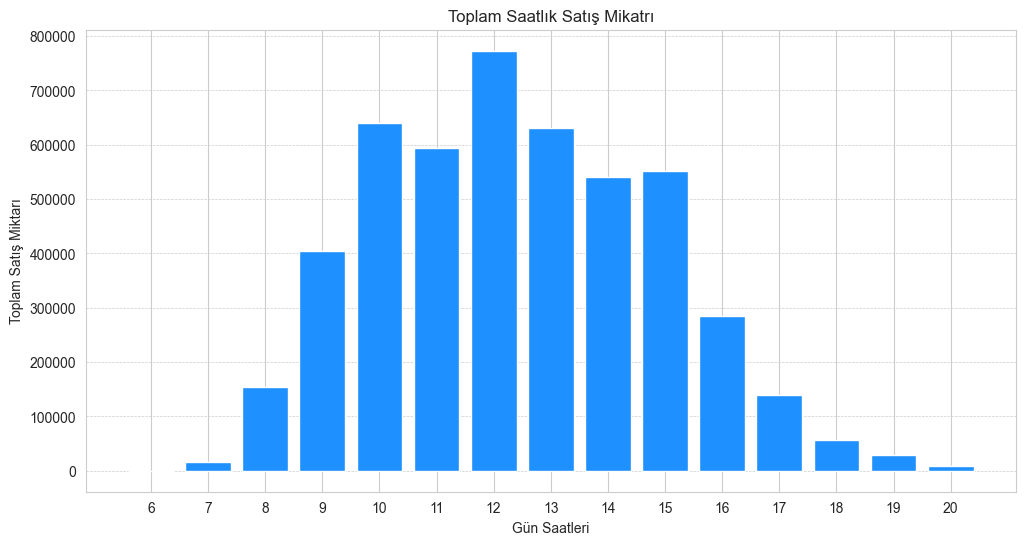

In [25]:
# 'Hour' sutunu oluşturma
df['Hour'] = df['InvoiceDate'].dt.hour

hourly_sales = df.groupby('Hour')['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(hourly_sales['Hour'], hourly_sales['Quantity'], color='dodgerblue')
plt.title('Toplam Saatlık Satış Mikatrı')
plt.xlabel('Gün Saatleri')
plt.ylabel('Toplam Satış Miktarı')
plt.xticks(hourly_sales['Hour'])
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


In [26]:
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hour')['Quantity'].sum().reset_index()
df.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,2011,1,10
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011,1,10
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011,1,10
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,2011,1,10
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,2011,1,10


In [27]:


# Diyelim ki 'InvoiceDate' sütunumuz var ve satışların tarihini tutuyor.
# İlk olarak, 'InvoiceDate' sütununu tarih-saat formatına çevirelim.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 'InvoiceDate' sütunundan sadece tarih bilgisini çekerek yeni bir sütun oluşturalım.
df['Date'] = df['InvoiceDate'].dt.date

# Şimdi, her gün için toplam satış miktarını hesaplayalım.
daily_sales = df.groupby('Date')['Quantity'].sum().reset_index()

# Sonra, günlük satış miktarlarının ortalamasını alalım.
average_daily_sales = daily_sales['Quantity'].mean()

print(f"Günlük ortalama satış miktarı: { round(average_daily_sales)} ")


Günlük ortalama satış miktarı: 16917 


In [28]:
top_product = df.groupby('Product')['Quantity'].sum().idxmax()
top_product_sales = df.groupby('Product')['Quantity'].sum().max()

top_customer = df.groupby('CustomerID')['Quantity'].sum().idxmax()
top_customer_sales = df.groupby('CustomerID')['Quantity'].sum().max()

print(f"En çok satılan ürün: {top_product}, \nToplam satış adedi: {top_product_sales}")
print(f"En çok ürün satın alan müşteri: {top_customer}, \nToplam satın alınan ürün adedi: {top_customer_sales}")

En çok satılan ürün: WORLD WAR 2 GLIDERS ASSTD DESIGNS, 
Toplam satış adedi: 48556
En çok ürün satın alan müşteri: 17841, 
Toplam satın alınan ürün adedi: 245371


C:\Users\leyla\AppData\Local\Temp\ipykernel_18720\2043751743.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_hourly_sales.index, y=average_hourly_sales.values, palette="viridis")


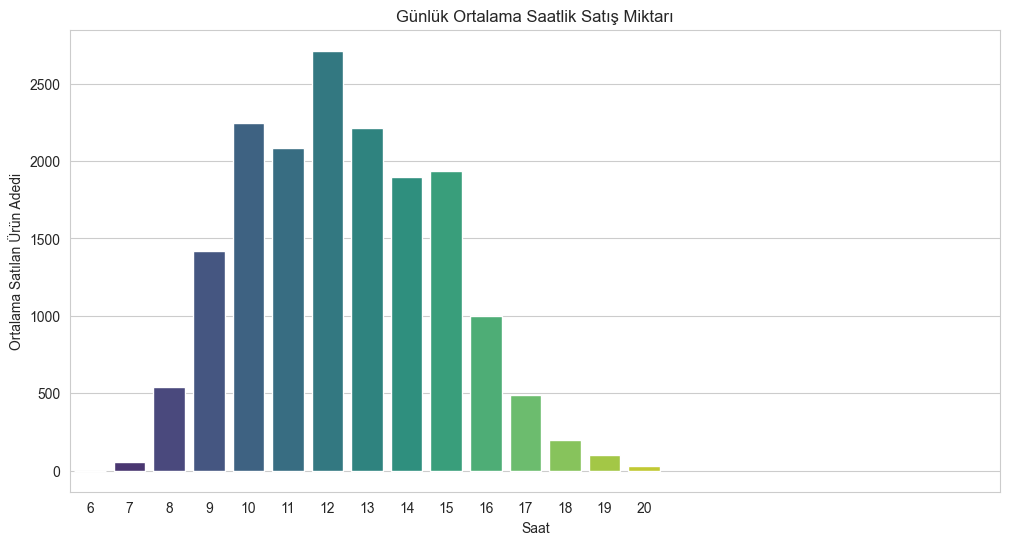

In [29]:

# Tarih-saat sütununu datetime türüne dönüştür
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Saat sütunu ekleyerek alışveriş yapılan saati çıkar
df['Hour'] = df['InvoiceDate'].dt.hour

# Veri setindeki benzersiz gün sayısını bul
unique_days = df['InvoiceDate'].dt.date.nunique()

# Saat bazında gruplandırıp, toplam satış miktarını bul
hourly_sales = df.groupby('Hour')['Quantity'].sum()

# Günlük ortalama satış miktarını hesapla
average_hourly_sales = hourly_sales / unique_days

# Günlük ortalama satışları görselleştir
plt.figure(figsize=(12, 6))
sns.barplot(x=average_hourly_sales.index, y=average_hourly_sales.values, palette="viridis")
plt.title('Günlük Ortalama Saatlik Satış Miktarı')
plt.xlabel('Saat')
plt.ylabel('Ortalama Satılan Ürün Adedi')
plt.xticks(range(0, 24))  # 24 saat için x eksenindeki işaretleri ayarlayın
plt.show()


In [30]:

# 'InvoiceNo' sütununda 'C' ile başlayan siparişleri filtrele
cancelled_orders = df[df['InvoiceNo'].str.startswith('C', na=False)]
print("Iptal edilen siparişler: ")
# İptal edilen siparişleri göster
cancelled_orders


Iptal edilen siparişler: 


,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Date
76,C540006,21306,SET/4 DAISY MIRROR MAGNETS,-1,2011-01-04 10:48:00,2.10,14606,United Kingdom,2011,1,10,2011-01-04
77,C540006,84352,SILVER CHRISTMAS TREE BAUBLE STAND,-1,2011-01-04 10:48:00,16.95,14606,United Kingdom,2011,1,10,2011-01-04
78,C540006,22423,REGENCY CAKESTAND 3 TIER,-1,2011-01-04 10:48:00,12.75,14606,United Kingdom,2011,1,10,2011-01-04
79,C540007,21055,TOOL BOX SOFT TOY,-6,2011-01-04 11:08:00,8.95,15379,United Kingdom,2011,1,11,2011-01-04
80,C540007,22274,FELTCRAFT DOLL EMILY,-6,2011-01-04 11:08:00,2.95,15379,United Kingdom,2011,1,11,2011-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...
497968,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,2011,12,9,2011-12-09
499060,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,2011,12,10,2011-12-09
499234,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,2011,12,11,2011-12-09
499235,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,2011,12,11,2011-12-09


C:\Users\leyla\AppData\Local\Temp\ipykernel_18720\1597265223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_orders['InvoiceDate'] = pd.to_datetime(cancelled_orders['InvoiceDate'])
C:\Users\leyla\AppData\Local\Temp\ipykernel_18720\1597265223.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_orders['YearMonth'] = cancelled_orders['InvoiceDate'].dt.to_period('M')


Aylık ortalama iptal edilen sipariş sayısı: 711.00


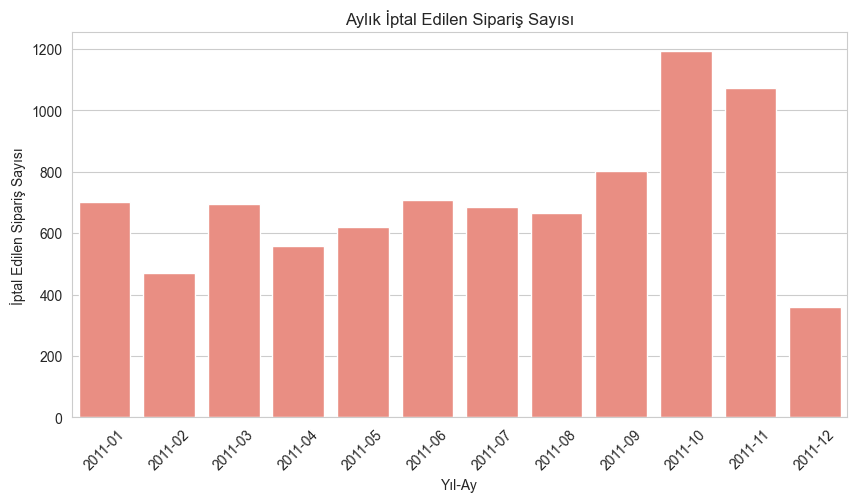

In [31]:

# İptal edilen siparişleri 'InvoiceNo' sütunundaki 'C' ile başlayanlar olarak filtreleme
cancelled_orders = df[df['InvoiceNo'].str.startswith('C', na=False)]

# İptal edilen siparişlerin tarihlerini 'InvoiceDate' sütununu kullanarak aylık periyodlara ayırır
cancelled_orders['InvoiceDate'] = pd.to_datetime(cancelled_orders['InvoiceDate'])
cancelled_orders['YearMonth'] = cancelled_orders['InvoiceDate'].dt.to_period('M')

# Aylık iptal edilen sipariş sayılarını grupla ve sayma
monthly_cancellations = cancelled_orders.groupby('YearMonth').size()

# Aylık iptal edilen sipariş sayısının ortalamasını hesaplar
average_monthly_cancellations = monthly_cancellations.mean()

print(f"Aylık ortalama iptal edilen sipariş sayısı: {average_monthly_cancellations:.2f}")

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_cancellations.index.astype(str), y=monthly_cancellations.values, color='salmon')
plt.title('Aylık İptal Edilen Sipariş Sayısı')
plt.xlabel('Yıl-Ay')
plt.ylabel('İptal Edilen Sipariş Sayısı')
plt.xticks(rotation=45)
plt.show()


C:\Users\leyla\AppData\Local\Temp\ipykernel_18720\4009369743.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cancelled_products.values, y=top_cancelled_products.index, palette="vlag")


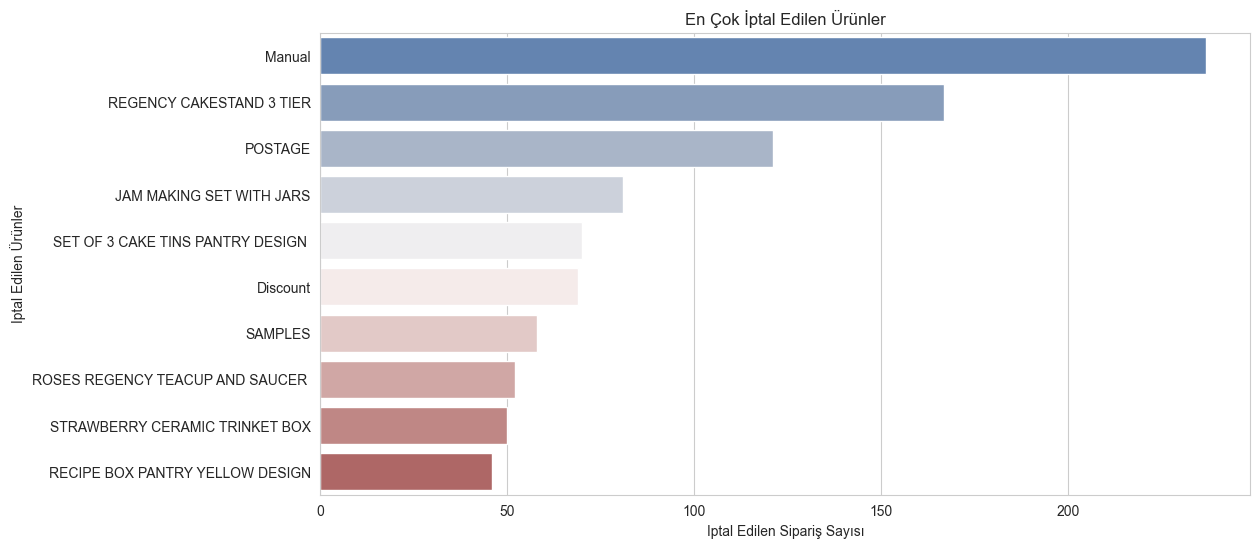

In [32]:

# İptal edilen siparişleri 'InvoiceNo' sütunundaki 'C' ile başlayanlar olarak filtrele
cancelled_orders = df[df['InvoiceNo'].str.startswith('C', na=False)]

# İptal edilen ürünlerin hangileri olduğunu bul
cancelled_products = cancelled_orders['Product'].value_counts()

# İptal edilen ürünleri azalan sırada sınırlı bir sayıda göster
top_cancelled_products = cancelled_products.head(10)  # En çok iptal edilen ilk 10 ürünü al

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cancelled_products.values, y=top_cancelled_products.index, palette="vlag")
plt.title('En Çok İptal Edilen Ürünler')
plt.xlabel('Iptal Edilen Sipariş Sayısı')
plt.ylabel('Iptal Edilen Ürünler')
plt.show()


In [33]:
unique_descriptions = df.groupby('StockCode')['Product'].unique()
description_dict = {code: desc[0] for code, desc in unique_descriptions.items() if len(desc) > 0}

sorted_description_dict = dict(sorted(description_dict.items()))

for code, description in sorted_description_dict.items():
    print(f"{code:<15} -> {description}")
# Description değerleri bir liste içinde tutulduğu için, join ile birleştirilebilir.
description_dict = {code: ', '.join(desc) for code, desc in unique_descriptions.items() if len(desc) > 0}


10002           -> INFLATABLE POLITICAL GLOBE 
10080           -> GROOVY CACTUS INFLATABLE
10120           -> DOGGY RUBBER
10123C          -> HEARTS WRAPPING TAPE 
10123G          -> WHITE HANGING HEART T-LIGHT HOLDER
10124A          -> SPOTS ON RED BOOKCOVER TAPE
10124G          -> ARMY CAMO BOOKCOVER TAPE
10125           -> MINI FUNKY DESIGN TAPES
10133           -> COLOURING PENCILS BROWN TUBE
10134           -> WHITE HANGING HEART T-LIGHT HOLDER
10135           -> COLOURING PENCILS BROWN TUBE
11001           -> ASSTD DESIGN RACING CAR PEN
15030           -> FAN BLACK FRAME 
15034           -> PAPER POCKET TRAVELING FAN 
15036           -> ASSORTED COLOURS SILK FAN
15039           -> SANDALWOOD FAN
15044A          -> PINK PAPER PARASOL 
15044B          -> BLUE PAPER PARASOL 
15044C          -> PURPLE PAPER PARASOL
15044D          -> RED PAPER PARASOL
15056BL         -> EDWARDIAN PARASOL BLACK
15056N          -> EDWARDIAN PARASOL NATURAL
15056P          -> EDWARDIAN PARASOL PINK
1505